# Practical work 08 - Clustering

## Imports

In [1]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [2]:
X1,label1 = pickle.load(open("dataset_1.pkl","rb"), encoding='latin1')
X2,label2 = pickle.load(open("dataset_2.pkl","rb"), encoding='latin1')

b) Visualize the data using various color for each unique labels

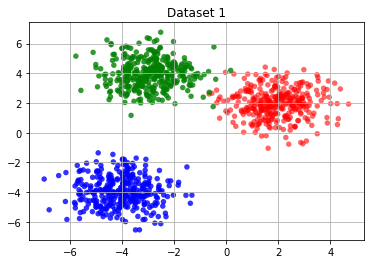

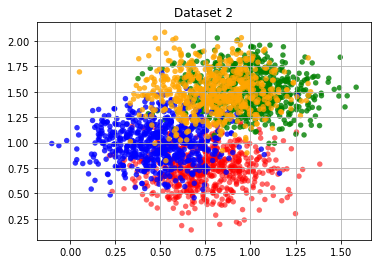

In [3]:
colors = ["red", "green", "blue", "orange", "purple"]
c1 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 0])
c2 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 1])
c3 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 2])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)

plt.title('Dataset 1')
plt.grid(True)
plt.show()

c1 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 0])
c2 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 1])
c3 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 2])
c4 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 3])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)
plt.scatter(c4[:, 0], c4[:,1], alpha=0.8, c=colors[3], edgecolors='none', s=30)

plt.title('Dataset 2')
plt.grid(True)
plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [4]:
def initCentroid(centroid_number, X):
    centroids = []
    for i in range(centroid_number):
        step = len(X) / centroid_number
        sorted_array = np.sort(X)
        #centroids.append(np.random.random((1, 2)) * 14 - 7) # Random version
        centroids.append(sorted_array[int(i * step)])
    return centroids

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span><br>
<span style="margin-left: 20px;">ii) Reevaluate the centroids</span><br>
c) Return the $k$ centroids.

In [5]:
def kmeans(n_class, X, epoch=10):
    centroids = initCentroid(n_class, X)
    avgDist=np.zeros([epoch])
    
    for i in range(epoch):
        # Init a dictionary that will hold {id_centroid : [array of point closest to this centroid]}
        centroid_dic = {}
        for id_centroid in range(len(centroids)):
            centroid_dic[id_centroid] = []

        for point in X:
            # Creation of a dictionary that will hold {id_centroid : [distance from this point to the centroid]}
            distances = {}
            for id_centroid in range(len(centroids)):
                distances[id_centroid] = []
                dist = np.linalg.norm(point - centroids[id_centroid])
                distances[id_centroid].append(dist)
            closest_centroid = min(distances.items(), key=lambda x: x[1])[0]
            centroid_dic[closest_centroid].append(point)
            
        for key, value in centroid_dic.items():
            centroid_dic[key] = np.array(value)

        centroids = np.empty((n_class, 2))
        
        # For each array, calculate the new centroid
        for key, centroid in centroid_dic.items():
            new_centroid = np.mean(centroid, axis=0)
            centroids[key] = new_centroid
        
        #average distances
        for key, centroid in centroid_dic.items():
            avg=0
            for p in centroid:
                avg+=sqrt(abs(p[0]-centroids[key][0])**2+abs(p[1]-centroids[key][1])**2)
            avg/=len(centroid)
            avgDist[i]+=avg
        avgDist[i]/=n_class
            
            
        
       
    return centroids, avgDist

We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [6]:
centroid, avgDist = kmeans(3, X1, 10)

Visualize your convergence criteria over the epochs using the dataset 1.

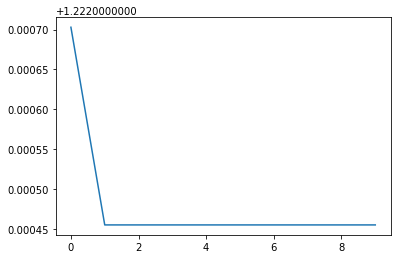

In [7]:
plt.plot(avgDist)

Visualize the output of your $k$-means on the dataset 1.

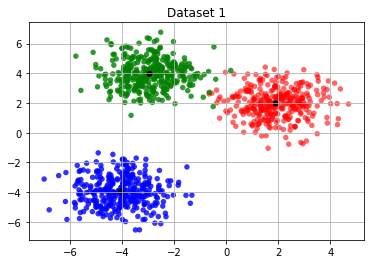

In [8]:
colors = ["red", "green", "blue", "orange", "purple"]
c1 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 0])
c2 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 1])
c3 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 2])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)
plt.scatter(centroid[:, 0], centroid[:,1], c="black", edgecolors='none')

plt.title('Dataset 1')
plt.grid(True)
plt.show()

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

_Your answer here_

Document your convergence criteria. Could you think about other convergence criteria?

_Your answer here_

Run your algorithm with the dataset 2.

In [9]:
centroid, avgDist = kmeans(4, X2, 10)

Visualize your convergence criteria over time using the dataset 2.

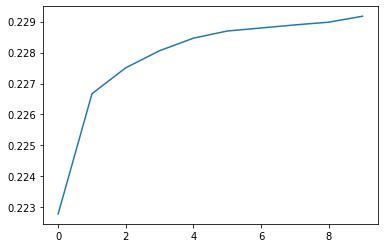

In [10]:
plt.plot(avgDist)

Visualize the output of your $k$-means on the dataset 2 and comment your results.

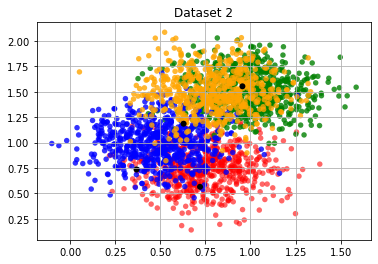

In [11]:
c1 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 0])
c2 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 1])
c3 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 2])
c4 = np.array([X2[i] for i in range(len(label2)) if label2[i] == 3])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)
plt.scatter(c4[:, 0], c4[:,1], alpha=0.8, c=colors[3], edgecolors='none', s=30)
plt.scatter(centroid[:, 0], centroid[:,1], c="black", edgecolors='none')

plt.title('Dataset 2')
plt.grid(True)
plt.show()

_Your comment_